# Question 3.1

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.svm import SVC as svc

In [45]:
def fetch_mnist():
    #Download MNIST dataset
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
    X = X.to_numpy()
    y = y.to_numpy()

    # Randomly sample 7000 images
    np.random.seed(2)
    indices = np.random.choice(len(X), 7000, replace=False)
    X, y = X[indices], y[indices]
    return X, y

X, y = fetch_mnist()
print(X.shape, y.shape)

C:\Users\emili\anaconda3\envs\data_analysis\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(7000, 784) (7000,)


# Question 3.2

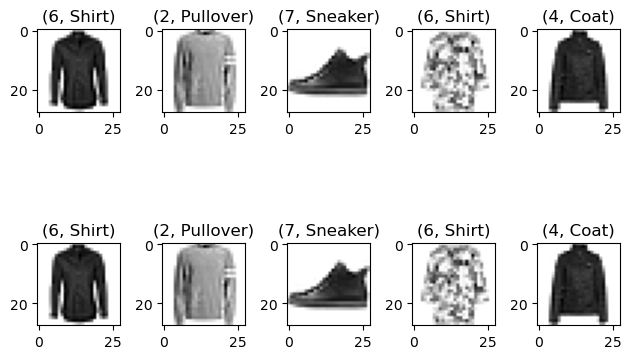

In [46]:
labels={'0': ' T-shirt/ top', '1': ' Trouser',
        '2': ' Pullover', '3': ' Dress', '4': ' Coat',
        '5': ' Sandal', '6': ' Shirt', '7': ' Sneaker', '8': ' Bag',
        '9': ' Ankle'}

X_im = np.apply_along_axis(lambda row: np.reshape(row, (28, 28)), axis=1, arr=X)

# Create a figure with a 1x10 grid of subplots
fig, axs = plt.subplots(2, 5)

# Plot data on the first subplot
for j in range(2):
    for i in range(5):
        axs[j,i].imshow(X_im[i],cmap="binary")
        axs[j,i].set_title(f'({y[i]},{labels[y[i]]})')

plt.tight_layout()
plt.show()

# Question 3.3

In [47]:
def cross_validation_error(X, y, model, n_folds):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    folds = np.array_split(indices, n_folds)

    train_errors = []
    validation_errors = []

    for fold in range(n_folds):
        val_indices = folds[fold]
        train_indices = 
        np.concatenate([folds[i] for i in range(n_folds) if i != fold])

        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        model.fit(X_train, y_train)
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        train_errors.append(np.mean(train_preds != y_train))
        validation_errors.append(np.mean(val_preds != y_val))

    avg_train_error = np.mean(train_errors)
    avg_val_error = np.mean(validation_errors)

    return avg_train_error, avg_val_error

In [52]:
def SVM_results(X_train, y_train, X_test, y_test):
    folds = 4
    results = {}

    # Polynomial and RBF parameter values
    pol_vals = [2, 4, 6, 8]
    RBF_vals = [0.001, 0.01, 0.1, 1.0, 10]

    # Linear SVM
    model = svc(kernel='linear')
    errors = cross_validation_error(X_train, y_train, model, folds)
    model.fit(X_train, y_train)
    test_predict = model.predict(X_test)
    test_error = np.sum(test_predict != y_test) / len(test_predict)
    results[f'SVM linear'] = (errors[0], errors[1], test_error)

    # Polynomial SVMs
    for d in pol_vals:
        model = svc(kernel='poly', degree=d)
        errors = cross_validation_error(X_train, y_train, model, folds)
        model.fit(X_train, y_train)
        test_predict = model.predict(X_test)
        test_error = np.sum(test_predict != y_test) / len(test_predict)
        results[f'SVM poly {d}'] = (errors[0], errors[1], test_error)

    # RBF SVMs
    for gamma in RBF_vals:
        model = svc(kernel='rbf', gamma=gamma)
        errors = cross_validation_error(X_train, y_train, model, folds)
        model.fit(X_train, y_train)
        test_predict = model.predict(X_test)
        test_error = np.sum(test_predict != y_test) / len(test_predict)
        results[f'SVM RBF {gamma}'] = (errors[0], errors[1], test_error)

    return results

# Question 3.4

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
results = SVM_results(X_train, y_train, X_test, y_test)

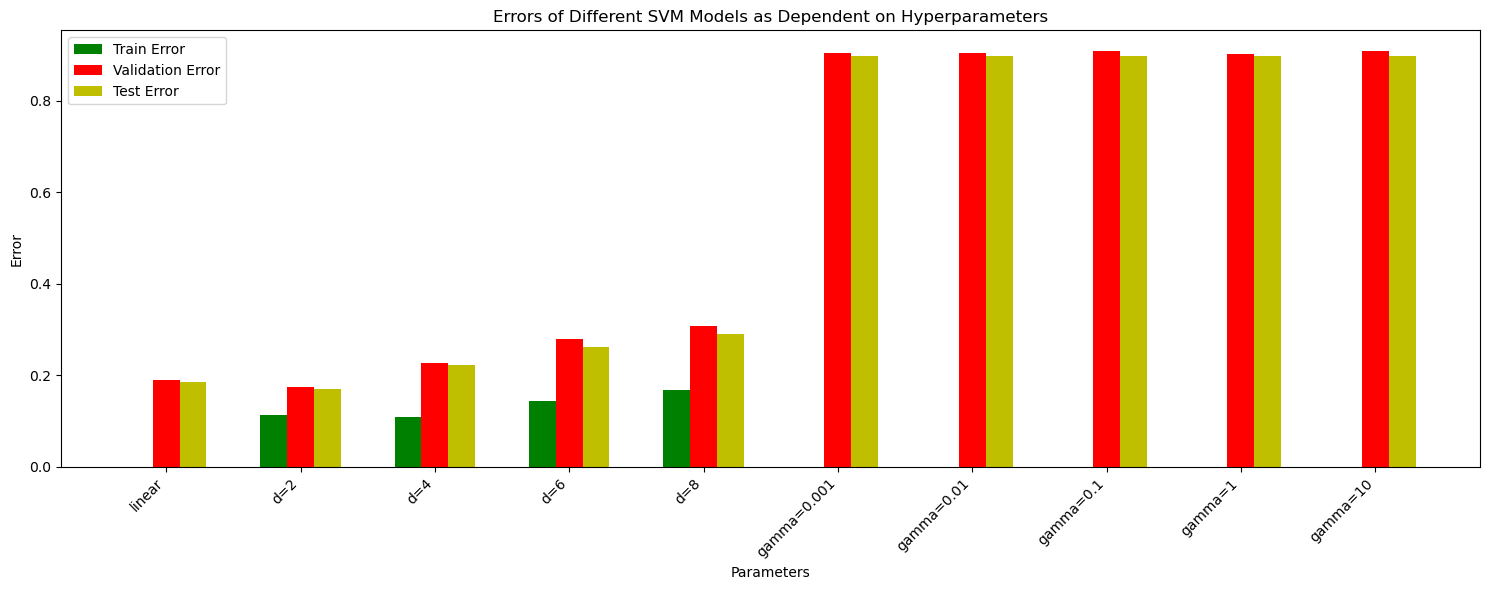

In [55]:
x = np.arange(10)
labels = [
    'linear', 'd=2', 'd=4', 'd=6', 'd=8',
    'gamma=0.001', 'gamma=0.01', 'gamma=0.1', 'gamma=1', 'gamma=10'
]

train_errors = []
val_errors = []
test_errors = []

# Polynomial and RBF parameter values
pol_vals = [2, 4, 6, 8]
rbf_vals = [0.001, 0.01, 0.1, 1.0, 10]

# Append errors for linear SVM
train_errors.append(results['SVM linear'][0])
val_errors.append(results['SVM linear'][1])
test_errors.append(results['SVM linear'][2])

# Append errors for polynomial SVMs
for d in pol_vals:
    train_errors.append(results[f'SVM poly {d}'][0])
    val_errors.append(results[f'SVM poly {d}'][1])
    test_errors.append(results[f'SVM poly {d}'][2])

# Append errors for RBF SVMs
for gamma in rbf_vals:
    train_errors.append(results[f'SVM RBF {gamma}'][0])
    val_errors.append(results[f'SVM RBF {gamma}'][1])
    test_errors.append(results[f'SVM RBF {gamma}'][2])

# Plotting the errors
plt.figure(figsize=(15, 6))

bar_width = 0.2

# Plotting train errors
plt.bar(x, train_errors, width=bar_width, label='Train Error', color='g')

# Plotting validation errors
plt.bar(x + bar_width, val_errors, width=bar_width, label='Validation Error', color='r')

# Plotting test errors
plt.bar(x + 2 * bar_width, test_errors, width=bar_width, label='Test Error', color='y')

# Setting labels and titles
plt.xlabel('Parameters')
plt.ylabel('Error')
plt.title('Errors of Different SVM Models as Dependent on Hyperparameters')

# Setting x-ticks with appropriate labels
plt.xticks(x + bar_width, labels, rotation=45, ha='right')

# Displaying the legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The best model for both CV and Test set is the polynomial kernel with d=2.